# Modeling the training data

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [302]:
current_year = 2023
na_values=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND',
           '-1.#QNAN', '-NaN', '-nan', '1.#IND',
           '1.#QNAN', 'N/A', 'NULL', 'NaN',
           'n/a', 'nan', 'null']
house_detail = pd.read_csv('data/train.csv',
                           na_values=na_values,
                           keep_default_na=False)
print(house_detail.shape)
house_detail.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


# Data Cleaning

In [303]:
# Check for empty values in the columns
def emptyCols(df):
    l = []
    for col in df.columns:
        empty_percent = round((df[col].isna().sum() / len(df[col])) * 100, 2)
        l.append(empty_percent)
    return pd.DataFrame({"columns": df.columns, "empty_percent":l})

emptyCols(house_detail).sort_values(ascending=False,by='empty_percent')

# There are no empty values


,columns,empty_percent
0,Id,0.0
41,CentralAir,0.0
59,GarageYrBlt,0.0
58,GarageType,0.0
57,FireplaceQu,0.0
...,...,...
26,MasVnrArea,0.0
25,MasVnrType,0.0
24,Exterior2nd,0.0
23,Exterior1st,0.0


### Data Description
       'MSSubClass',  # Identifies the type of dwelling involved in the sale - categorical
       'MSZoning',    # Identifies the general zoning classification of the sale - categorical
       'LotFrontage', # Linear feet of street connected to property - numerical
       'LotArea',     # Lot size in square feet - numerical
       'Street',      # Type of road access to property - categorical
       'Alley',       # Type of alley access to property - categorical
       'LotShape',    # General shape of property - categorical
       'LandContour', # Flatness of the property - categorical
       'Utilities',   # Type of utilities available - categorical
       'LotConfig',   # Lot configuration - categorical
       'LandSlope',   # Slope of property - categorical
       'Neighborhood', # Physical locations within Ames city limits - categorical
       'Condition1',  # Proximity to various conditions - categorical
       'Condition2',  # Proximity to various conditions - categorical
       'BldgType',    # Type of dwelling - categorical
       'HouseStyle',  # Style of dwelling - categorical
       'OverallQual', # Rates the overall material and finish of the house - categorical
       'OverallCond', # Rates the overall condition of the house - categorical
       'YearBuilt',   # Original construction date - Categorical Ordinal
       'YearRemodAdd',# Remodel date (same as construction date if no remodeling or additions) - Categorical Ordinal
       'RoofStyle',  # Type of roof - Categorical
       'RoofMatl',   # RoofMatl - Categorical
       'Exterior1st', # Exterior covering on house - Categorical
       'Exterior2nd', # Exterior covering on house - Categorical
       'MasVnrType',  # Masonry veneer type - Categorical
       'MasVnrArea',  # Masonry veneer area in square feet - Numerical
       'ExterQual',   # Evaluates the quality of the material on the exterior - Categorical
       'ExterCond',   # Evaluates the present condition of the material on the exterior - Categorical
       'Foundation',  # Type of foundation - Categorical
       'BsmtQual',    # Evaluates the height of the basement - Categorical
       'BsmtCond',    # Evaluates the general condition of the basement
       'BsmtExposure', # Refers to walkout or garden level walls - Categorical
       'BsmtFinType1', # Rating of basement finished area - Categorical
       'BsmtFinSF1',   # Type 1 finished square feet - Numerical
       'BsmtFinType2', # Rating of basement finished area - Categorical
       'BsmtFinSF2',   # Type 2 finished square feet - Numerical
       'BsmtUnfSF',    # Unfinished square feet of basement area - Numerical
       'TotalBsmtSF',  # Total square feet of basement area - Numerical
       'Heating',      # Type of heating - Categorical
       'HeatingQC',    # Heating quality and condition - Categorical
       'CentralAir',   # Central air conditioning - Categorical (Bool)
       'Electrical',   # Electrical system - Categorical
       '1stFlrSF',     # First Floor square feet - Numerical
       '2ndFlrSF',     # Second floor square feet - Numerical
       'LowQualFinSF', # Low quality finished square feet (all floors) - Numerical
       'GrLivArea',    # Above grade (ground) living area square feet - Numerical
       'BsmtFullBath', # Basement full bathrooms -  Categorical
       'BsmtHalfBath', # Basement half bathrooms -  Categorical
       'FullBath',     # Full bathrooms above grade - Categorical
       'HalfBath',     # Half baths above grade  - Categorical
       'BedroomAbvGr', # Bedrooms above grade - Categorical
       'KitchenAbvGr', # Kitchens above grade - Categorical
       'KitchenQual',  # Kitchen quality - Categorical
       'TotRmsAbvGrd', # Total rooms above grade - Categorical
       'Functional',   # Home functionality - Categorical
       'Fireplaces',   # Number of fireplaces - Categorical
       'FireplaceQu',  # fireplace Quality - Categorical
       'GarageType',   # Garage location - Categorical
       'GarageYrBlt',  # Year garage was built - Categorical Ordinal
       'GarageFinish', # Interior finish of the garage - Categorical
       'GarageCars',   # Size of garage in car capacity - Categorical
       'GarageArea',   # Size of garage in square feet - Numerical
       'GarageQual',   # Garage quality - Categorical
       'GarageCond',   # Garage Condition - Categorical
       'PavedDrive',   # Paved Driveway - Categorical
       'WoodDeckSF',   # Wood deck area in square feet - Numerical
       'OpenPorchSF',  # Open Porch area in square feet - Numerical
       'EnclosedPorch',# Enclosed porch area in square feet - Numerical
       '3SsnPorch',    # Three season porch area in square feet - Numerical
       'ScreenPorch',  # Screen porch area in square feet - Numerical
       'PoolArea',     # Pool area in square feet - Numerical
       'PoolQC',       # Pool quality - Categorical
       'Fence',        # Fence quality - Categorical
       'MiscFeature',  # Categorical
       'MiscVal',      # $Value of miscellaneous feature - Numerical
       'MoSold',       # Month Sold - Categorical Ordinal
       'YrSold',       # Year Sold - Categorical Ordinal
       'SaleType',     # Type of sale - Categorical
       'SaleCondition',# Condition of sale - Categorical
       'SalePrice'     # target variable



In [304]:
# convert Boolean columns to 1/0
house_detail['CentralAir'] =  house_detail.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)


In [305]:
numerical_cols = ['LotFrontage',
                  'LotArea',
                  'MasVnrArea',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  '1stFlrSF',
                  '2ndFlrSF',
                  'LowQualFinSF',
                  'GrLivArea',
                  'BsmtFinSF1',
                  'GarageArea',
                  'WoodDeckSF',
                  'OpenPorchSF',
                  'EnclosedPorch',
                  '3SsnPorch',
                  'ScreenPorch',
                  'PoolArea',
                  'MiscVal',
                  'SalePrice'
                  ]

categorical_cols = ['MSSubClass',
                    'MSZoning',
                    'Street',
                    'Alley',
                    'LotShape',
                    'LandContour',
                    'Utilities',
                    'LotConfig',
                    'LandSlope',
                    'Neighborhood',
                    'Condition1',
                    'Condition2',
                    'BldgType',
                    'HouseStyle',
                    'OverallQual',
                    'OverallCond',
                    'RoofStyle',
                    'RoofMatl',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'ExterQual',
                    'ExterCond',
                    'Foundation',
                    'BsmtQual',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinType2',
                    'BsmtFullBath',
                    'BsmtHalfBath',
                    'Heating',
                    'HeatingQC',
                    'CentralAir',
                    'Electrical',
                    'KitchenQual',
                    'Functional',
                    'FireplaceQu',
                    'FullBath',
                    'HalfBath',
                    'BedroomAbvGr',
                    'KitchenAbvGr',
                    'TotRmsAbvGrd',
                    'Fireplaces',
                    'GarageCars',
                    'GarageType',
                    'GarageFinish',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive',
                    'PoolQC',
                    'Fence',
                    'MiscFeature',
                    'SaleType',
                    'SaleCondition'
                    ]

categorical_ordinal_cols = [
    'YearBuilt',
    'YearRemodAdd',
    'GarageYrBlt',
    'MoSold',
    'YrSold'
]

print("{} numerical columns".format(len(numerical_cols)))
print("{} categorical columns".format(len(categorical_cols)))
print("{} categorical ordinal columns".format(len(categorical_ordinal_cols)))
print("{} shape".format(house_detail.shape))
house_detail[house_detail['LotFrontage'] == 'NA'].shape[0]

20 numerical columns
54 categorical columns
5 categorical ordinal columns
(1460, 81) shape


259

### Cleaning numerical columns

In [306]:
def NACols(df):
    l = []
    for col in df.columns:
        empty_percent = round((df[df[col] == 'NA'].shape[0] / len(df[col])) * 100, 2)
        l.append(empty_percent)
    return pd.DataFrame({"columns": df.columns, "na_percent":l})

NACols(house_detail[numerical_cols]).sort_values(ascending=False,by='na_percent')


,columns,na_percent
0,LotFrontage,17.74
2,MasVnrArea,0.55
11,GarageArea,0.00
18,MiscVal,0.00
17,PoolArea,0.00
16,ScreenPorch,0.00
15,3SsnPorch,0.00
14,EnclosedPorch,0.00
13,OpenPorchSF,0.00
12,WoodDeckSF,0.00


In [307]:
# LotFrontage is 17.7% of the data; update NA to 0 indicating no Frontage
house_detail['LotFrontage'] = house_detail['LotFrontage'].apply(lambda x: 0 if x == 'NA' else x)

# MasVnrArea is only 0.5% of the data; removing the rows
house_detail = house_detail[~(house_detail['MasVnrArea'] == 'NA')]

house_detail['LotFrontage'] = house_detail['LotFrontage'].astype('int64')
house_detail['MasVnrArea'] = house_detail['MasVnrArea'].astype('int64')

NACols(house_detail[numerical_cols]).sort_values(ascending=False,by='na_percent')



,columns,na_percent
0,LotFrontage,0.0
1,LotArea,0.0
18,MiscVal,0.0
17,PoolArea,0.0
16,ScreenPorch,0.0
15,3SsnPorch,0.0
14,EnclosedPorch,0.0
13,OpenPorchSF,0.0
12,WoodDeckSF,0.0
11,GarageArea,0.0


### Cleaning Categorical columns

In [308]:
house_detail[categorical_ordinal_cols].info()
NACols(house_detail[categorical_ordinal_cols]).sort_values(ascending=False,by='na_percent')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YearBuilt     1452 non-null   int64 
 1   YearRemodAdd  1452 non-null   int64 
 2   GarageYrBlt   1452 non-null   object
 3   MoSold        1452 non-null   int64 
 4   YrSold        1452 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 68.1+ KB


,columns,na_percent
2,GarageYrBlt,5.58
0,YearBuilt,0.00
1,YearRemodAdd,0.00
3,MoSold,0.00
4,YrSold,0.00


In [309]:
house_detail[house_detail['GarageType'] == 'NA']['GarageYrBlt'].value_counts()
## GarageYrBlt is NA only for GarageType == NA
## Better to calculate number of years and drop all date columns

house_detail['RemodAdd_Yrs'] = house_detail.apply(lambda x: current_year - int(x['YearRemodAdd']) if x['YearRemodAdd'] != 'NA' else 0,axis=1)
house_detail['GarageBlt_Yrs'] = house_detail.apply(lambda x: current_year - int(x['GarageYrBlt']) if x['GarageYrBlt'] != 'NA' else 0,axis=1)
house_detail['Sold_Yrs'] = house_detail.apply(lambda x: current_year - int(x['YrSold']) if x['YrSold'] != 'NA' else 0,axis=1)
house_detail['Built_Yrs'] = house_detail.apply(lambda x: current_year - int(x['YearBuilt']) if x['YearBuilt'] != 'NA' else 0,axis=1)

house_detail.drop('GarageYrBlt', axis=1, inplace=True)
categorical_ordinal_cols.remove('GarageYrBlt')
categorical_ordinal_cols.append('GarageBlt_Yrs')
categorical_ordinal_cols.remove('YrSold')
categorical_ordinal_cols.append('Sold_Yrs')
categorical_ordinal_cols.remove('YearBuilt')
categorical_ordinal_cols.append('Built_Yrs')
categorical_ordinal_cols.remove('YearRemodAdd')
categorical_ordinal_cols.append('RemodAdd_Yrs')

house_detail[categorical_ordinal_cols].info()

NACols(house_detail[categorical_ordinal_cols]).sort_values(ascending=False,by='na_percent')




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MoSold         1452 non-null   int64
 1   GarageBlt_Yrs  1452 non-null   int64
 2   Sold_Yrs       1452 non-null   int64
 3   Built_Yrs      1452 non-null   int64
 4   RemodAdd_Yrs   1452 non-null   int64
dtypes: int64(5)
memory usage: 68.1 KB


,columns,na_percent
0,MoSold,0.0
1,GarageBlt_Yrs,0.0
2,Sold_Yrs,0.0
3,Built_Yrs,0.0
4,RemodAdd_Yrs,0.0


In [310]:
NACols(house_detail[categorical_cols]).sort_values(ascending=False,by='na_percent')


,columns,na_percent
49,PoolQC,99.52
51,MiscFeature,96.28
3,Alley,93.80
50,Fence,80.65
36,FireplaceQu,47.25
46,GarageQual,5.58
45,GarageFinish,5.58
44,GarageType,5.58
47,GarageCond,5.58
25,BsmtExposure,2.62


In [311]:
# Drop PoolQA, MiscFeature, Alley, Fence as they are NA for > 80%
drop_cat_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
[house_detail.drop(col, axis=1, inplace=True) for col in drop_cat_cols]
[categorical_cols.remove(col) for col in drop_cat_cols]

NACols(house_detail[categorical_cols]).sort_values(ascending=False,by='na_percent')
# Update all value of 'NA' for Categorical variables to indicate No XX
house_detail['FireplaceQu'] = house_detail.FireplaceQu.apply(lambda x: 'NoFireplaceQu' if x == 'NA' else x)
house_detail['GarageType'] = house_detail.GarageType.apply(lambda x: 'NoGarage' if x == 'NA' else x)
house_detail['GarageCond'] = house_detail.GarageCond.apply(lambda x: 'NoGarage' if x == 'NA' else x)
house_detail['GarageQual'] = house_detail.GarageQual.apply(lambda x: 'NoGarage' if x == 'NA' else x)
house_detail['GarageFinish'] = house_detail.GarageFinish.apply(lambda x: 'NoGarage' if x == 'NA' else x)

house_detail['BsmtExposure'] = house_detail.BsmtExposure.apply(lambda x: 'NoBasement' if x == 'NA' else x)
house_detail['BsmtFinType1'] = house_detail.BsmtFinType1.apply(lambda x: 'NoBasement' if x == 'NA' else x)
house_detail['BsmtFinType2'] = house_detail.BsmtFinType2.apply(lambda x: 'NoBasement' if x == 'NA' else x)
house_detail['BsmtQual'] = house_detail.BsmtQual.apply(lambda x: 'NoBasement' if x == 'NA' else x)

print(len(house_detail[house_detail['Electrical'] == 'NA']))
# only one row with NA - remove
house_detail = house_detail[~(house_detail['Electrical'] == 'NA')]
NACols(house_detail[categorical_cols]).sort_values(ascending=False,by='na_percent')


1


,columns,na_percent
0,MSSubClass,0.0
37,HalfBath,0.0
27,BsmtFullBath,0.0
28,BsmtHalfBath,0.0
29,Heating,0.0
30,HeatingQC,0.0
31,CentralAir,0.0
32,Electrical,0.0
33,KitchenQual,0.0
34,Functional,0.0


In [312]:
def ZeroCols(df):
    l = []
    for col in df.columns:
        empty_percent = round((df[df[col] == 0].shape[0] / len(df[col])) * 100, 2)
        l.append(empty_percent)
    return pd.DataFrame({"columns": df.columns, "zero_percent":l})

ZeroCols(house_detail[categorical_cols]).sort_values(ascending=False,by='zero_percent')



,columns,zero_percent
28,BsmtHalfBath,94.35
37,HalfBath,62.72
27,BsmtFullBath,58.79
41,Fireplaces,47.21
31,CentralAir,6.55
42,GarageCars,5.58
36,FullBath,0.62
38,BedroomAbvGr,0.41
39,KitchenAbvGr,0.07
35,FireplaceQu,0.00


In [313]:
# Removing BsmtHalfBath which has 94% are zero
house_detail.drop('BsmtHalfBath', axis=1, inplace=True)
# Removing BsmtHalfBath which has 62.7%  are zero
house_detail.drop('HalfBath', axis=1, inplace=True)
categorical_cols.remove('BsmtHalfBath')
categorical_cols.remove('HalfBath')

In [314]:
drop_cat_cols = []
for col in categorical_cols:
    vc = house_detail[col].value_counts()
    dic = {}
    for inx in vc.index:
        percent = round((vc[inx] / vc.sum()) * 100, 2)
        if percent > 79:
            dic.update({inx: percent})
    if len(dic)  > 0:
        drop_cat_cols.append(col)
        print(col)
        print(dic)
        print("-----")



Street
{'Pave': 99.59}
-----
LandContour
{'Lvl': 89.73}
-----
Utilities
{'AllPub': 99.93}
-----
LandSlope
{'Gtl': 94.62}
-----
Condition1
{'Norm': 86.22}
-----
Condition2
{'Norm': 98.97}
-----
BldgType
{'1Fam': 83.53}
-----
RoofMatl
{'CompShg': 98.21}
-----
ExterCond
{'TA': 87.73}
-----
BsmtFinType2
{'Unf': 85.94}
-----
Heating
{'GasA': 97.79}
-----
CentralAir
{1: 93.45}
-----
Electrical
{'SBrkr': 91.39}
-----
Functional
{'Typ': 93.18}
-----
KitchenAbvGr
{1: 95.38}
-----
GarageQual
{'TA': 89.73}
-----
GarageCond
{'TA': 90.76}
-----
PavedDrive
{'Y': 91.73}
-----
SaleType
{'WD': 86.91}
-----
SaleCondition
{'Normal': 82.22}
-----


In [315]:
# these columns don't have diverse enough data to contribute to the columns - so drop these
print("drop columns that have 80% of the columns of same values {}".format(drop_cat_cols))
house_detail.drop(drop_cat_cols, axis=1, inplace=True)
[categorical_cols.remove(col) for col in drop_cat_cols]


drop columns that have 80% of the columns of same values ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'KitchenAbvGr', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [316]:
cols_to_convert = house_detail[categorical_cols].select_dtypes(include=['int64']).columns
house_detail[cols_to_convert] = house_detail[cols_to_convert].astype('object')
house_detail[categorical_cols].info()
house_detail.shape
# drop columns that have 80% 0 as value in numerical data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1451 non-null   object
 1   MSZoning      1451 non-null   object
 2   LotShape      1451 non-null   object
 3   LotConfig     1451 non-null   object
 4   Neighborhood  1451 non-null   object
 5   HouseStyle    1451 non-null   object
 6   OverallQual   1451 non-null   object
 7   OverallCond   1451 non-null   object
 8   RoofStyle     1451 non-null   object
 9   Exterior1st   1451 non-null   object
 10  Exterior2nd   1451 non-null   object
 11  MasVnrType    1451 non-null   object
 12  ExterQual     1451 non-null   object
 13  Foundation    1451 non-null   object
 14  BsmtQual      1451 non-null   object
 15  BsmtExposure  1451 non-null   object
 16  BsmtFinType1  1451 non-null   object
 17  BsmtFullBath  1451 non-null   object
 18  HeatingQC     1451 non-null   object
 19  Kitche

(1451, 58)

### Removing Outliers


In [317]:
house_detail[numerical_cols].describe([0.1,0.5,0.8,0.9,0.95])


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,57.624397,10507.808408,103.75672,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,442.274983,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999
std,34.655808,9992.987081,181.10815,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,455.369276,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273
min,0.000000,1300.000000,0.00000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
10%,0.000000,5000.000000,0.00000,0.000000,74.000000,637.000000,757.000000,0.000000,0.000000,912.000000,0.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106250.000000
50%,63.000000,9477.000000,0.00000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,381.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
80%,80.000000,12205.000000,206.00000,0.000000,896.000000,1391.000000,1482.000000,795.000000,0.000000,1868.000000,795.000000,621.000000,192.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230000.000000
90%,92.000000,14375.000000,335.00000,119.000000,1232.000000,1602.000000,1680.000000,954.000000,0.000000,2158.000000,1064.000000,757.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,104.000000,17308.500000,456.00000,398.000000,1468.000000,1749.000000,1827.000000,1141.500000,0.000000,2464.000000,1272.000000,849.000000,335.000000,173.000000,180.000000,0.000000,160.000000,0.000000,0.000000,325812.000000
max,313.000000,215245.000000,1600.00000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,5644.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [318]:

ZeroCols(house_detail[numerical_cols]).sort_values(ascending=False,by='zero_percent')

,columns,zero_percent
17,PoolArea,99.52
15,3SsnPorch,98.35
8,LowQualFinSF,98.21
18,MiscVal,96.42
16,ScreenPorch,92.01
3,BsmtFinSF2,88.49
14,EnclosedPorch,85.73
2,MasVnrArea,59.27
7,2ndFlrSF,56.79
12,WoodDeckSF,52.03


In [319]:
# drop numerical columns with large number of zero; as they don't contribute to model in a meaningful way
drop_num_cols = ['PoolArea', '3SsnPorch', 'LowQualFinSF',
                 'MiscVal', 'ScreenPorch', 'BsmtFinSF2','EnclosedPorch']

house_detail.drop(drop_num_cols, inplace=True, axis=1)
[numerical_cols.remove(x) for x in drop_num_cols]
house_detail[numerical_cols].describe([0.1,0.25,0.5,0.8,0.9,0.95])


,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,57.624397,10507.808408,103.75672,567.197105,1056.310131,1161.551344,346.742247,1514.174363,442.274983,472.525155,94.412819,46.422467,180624.101999
std,34.655808,9992.987081,181.10815,442.209192,437.914609,385.002532,436.453277,525.799521,455.369276,214.171752,125.436852,66.060150,79312.128273
min,0.000000,1300.000000,0.00000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
10%,0.000000,5000.000000,0.00000,74.000000,637.000000,757.000000,0.000000,912.000000,0.000000,240.000000,0.000000,0.000000,106250.000000
25%,42.000000,7537.500000,0.00000,222.000000,795.000000,882.000000,0.000000,1128.000000,0.000000,327.500000,0.000000,0.000000,129900.000000
50%,63.000000,9477.000000,0.00000,479.000000,991.000000,1086.000000,0.000000,1464.000000,381.000000,478.000000,0.000000,24.000000,162500.000000
80%,80.000000,12205.000000,206.00000,896.000000,1391.000000,1482.000000,795.000000,1868.000000,795.000000,621.000000,192.000000,82.000000,230000.000000
90%,92.000000,14375.000000,335.00000,1232.000000,1602.000000,1680.000000,954.000000,2158.000000,1064.000000,757.000000,262.000000,130.000000,278000.000000
95%,104.000000,17308.500000,456.00000,1468.000000,1749.000000,1827.000000,1141.500000,2464.000000,1272.000000,849.000000,335.000000,173.000000,325812.000000


In [320]:
house_detail.shape

(1451, 51)

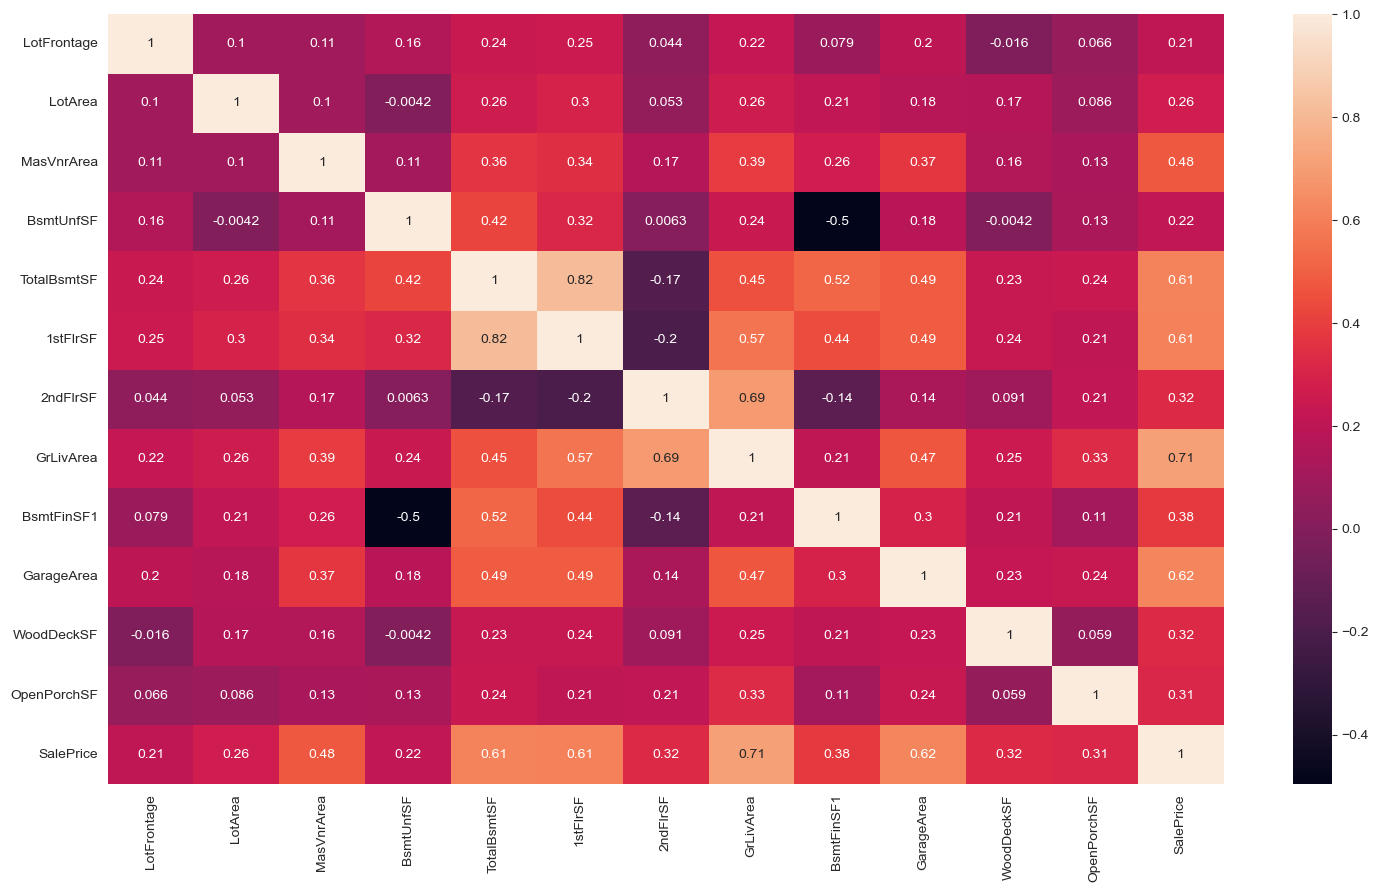

In [321]:
# Correlation on a heatmap
cor = house_detail[numerical_cols].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(cor, annot=True)
plt.show()

There seems to be a high co-relation between
- 1stFlrSF to TotalBasemtSF (0.82)
- GrLivArea to 2ndFlrSF     (0.69)

Since these independent variables are highly co-linear we will disregard TotalBasemtSF and  2ndFlrSF

In [322]:
drop_num_cols = ['TotalBsmtSF', '2ndFlrSF']
house_detail.drop(drop_num_cols, inplace=True, axis=1)
[numerical_cols.remove(x) for x in drop_num_cols]
house_detail[numerical_cols].describe([0.1,0.25,0.5,0.8,0.9,0.95])

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,57.624397,10507.808408,103.75672,567.197105,1161.551344,1514.174363,442.274983,472.525155,94.412819,46.422467,180624.101999
std,34.655808,9992.987081,181.10815,442.209192,385.002532,525.799521,455.369276,214.171752,125.436852,66.060150,79312.128273
min,0.000000,1300.000000,0.00000,0.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
10%,0.000000,5000.000000,0.00000,74.000000,757.000000,912.000000,0.000000,240.000000,0.000000,0.000000,106250.000000
25%,42.000000,7537.500000,0.00000,222.000000,882.000000,1128.000000,0.000000,327.500000,0.000000,0.000000,129900.000000
50%,63.000000,9477.000000,0.00000,479.000000,1086.000000,1464.000000,381.000000,478.000000,0.000000,24.000000,162500.000000
80%,80.000000,12205.000000,206.00000,896.000000,1482.000000,1868.000000,795.000000,621.000000,192.000000,82.000000,230000.000000
90%,92.000000,14375.000000,335.00000,1232.000000,1680.000000,2158.000000,1064.000000,757.000000,262.000000,130.000000,278000.000000
95%,104.000000,17308.500000,456.00000,1468.000000,1827.000000,2464.000000,1272.000000,849.000000,335.000000,173.000000,325812.000000


### Categorical Variable conversion

In [323]:
house_detail['MSZoning'] = house_detail.MSZoning.apply(lambda x: 'C' if x == 'C (all)' else x)

def overAllQuality(x):
    if x < 5:
        return "Low"
    elif x <= 7:
        return "Good"
    else:
        return "Very Good"

house_detail['OverallQual'] = house_detail.OverallQual.apply(lambda x: overAllQuality(x))
house_detail['OverallCond'] = house_detail.OverallCond.apply(lambda x: overAllQuality(x))
house_detail[categorical_cols].head()


,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,...,HeatingQC,KitchenQual,FireplaceQu,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageType,GarageFinish
0,60,RL,Reg,Inside,CollgCr,2Story,Good,Good,Gable,VinylSd,...,Ex,Gd,NoFireplaceQu,2,3,8,0,2,Attchd,RFn
1,20,RL,Reg,FR2,Veenker,1Story,Good,Very Good,Gable,MetalSd,...,Ex,TA,TA,2,3,6,1,2,Attchd,RFn
2,60,RL,IR1,Inside,CollgCr,2Story,Good,Good,Gable,VinylSd,...,Ex,Gd,TA,2,3,6,1,2,Attchd,RFn
3,70,RL,IR1,Corner,Crawfor,2Story,Good,Good,Gable,Wd Sdng,...,Gd,Gd,Gd,1,3,7,1,3,Detchd,Unf
4,60,RL,IR1,FR2,NoRidge,2Story,Very Good,Good,Gable,VinylSd,...,Ex,Gd,TA,2,4,9,1,3,Attchd,RFn


In [324]:
ref_values = {'MSSubClass': '20', 'MSZoning':'RL','LotConfig':'Inside', 'LotShape':'Reg','Neighborhood':'NAmes',
              'LandContour':'Lvl','HouseStyle':'1Story', 'OverallQual': 'Good','OverallCond':'Good',
              'RoofStyle':'Gable','Exterior1st':'VinylSd','Exterior2nd':'VinylSd','MasVnrType':'None',
              'ExterQual':'TA', 'Foundation':'PConc','BsmtQual':'TA','BsmtExposure':'No','BsmtFinType1':'Unf',
              'BsmtFullBath': '0','HeatingQC':'Ex','KitchenQual':'TA','FireplaceQu':'TA','FullBath':'2','BedroomAbvGr':'3','TotRmsAbvGrd':'6',
              'Fireplaces':'0','GarageCars':'2','GarageType':'Attchd','GarageFinish':'Unf'}

y = house_detail['SalePrice']
numerical_cols.remove('SalePrice')
X = house_detail[numerical_cols + categorical_cols + categorical_ordinal_cols]


In [325]:
dummy_col = pd.get_dummies(X[categorical_cols], drop_first=True)
X.drop(categorical_cols, axis=1,inplace=True)
X = pd.concat([X, dummy_col], axis=1)


D:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\jubin\AppData\Local\Temp\ipykernel_1972\3471231130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(categorical_cols, axis=1,inplace=True)


In [326]:
print(len(X.columns))

186


## Model Building and Evaluation


In [327]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)

(1015, 186)
(436, 186)


In [328]:
# Scaling numerical variables to fit the categorical variables
scaler = MinMaxScaler()
X_train[numerical_cols+ categorical_ordinal_cols] = scaler.fit_transform(X_train[numerical_cols + categorical_ordinal_cols])
X_train

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFinSF1,GarageArea,WoodDeckSF,OpenPorchSF,...,GarageCars_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
801,0.127796,0.016359,0.000000,0.427654,0.178185,0.145657,0.034904,0.310296,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,1
569,0.000000,0.026792,0.000000,0.000000,0.118712,0.097041,0.167080,0.423131,0.049008,0.000000,...,0,0,0,0,0,1,0,0,0,1
1181,0.204473,0.020038,0.116250,0.051370,0.285378,0.233282,0.262225,0.339915,0.189032,0.096892,...,0,1,0,0,0,0,0,0,0,0
808,0.271565,0.056557,0.654375,0.162671,0.152327,0.124520,0.091425,0.341326,0.000000,0.000000,...,0,1,0,0,0,0,0,0,1,0
1095,0.249201,0.037472,0.000000,0.552226,0.205924,0.168332,0.004252,0.310296,0.000000,0.040219,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.290735,0.051294,0.160000,0.606592,0.232722,0.190238,0.000000,0.390691,0.000000,0.109689,...,0,1,0,0,0,0,0,0,1,0
53,0.217252,0.228895,0.000000,0.013699,0.330042,0.269792,0.320695,0.630465,1.000000,0.131627,...,0,1,0,0,0,0,0,0,0,0
351,0.000000,0.018561,0.000000,0.158818,0.238599,0.195042,0.191708,0.313822,0.000000,0.146252,...,0,1,0,0,0,0,0,0,1,0
79,0.191693,0.042721,0.000000,0.188356,0.057358,0.152191,0.000000,0.310296,0.086348,0.000000,...,0,0,0,0,0,1,0,0,0,1


In [329]:

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train score: {}".format(round(r2_train_lr,2)) )
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train data: {}".format(round(rss1_lr, 2)))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE for train data: {}".format(round(mse_train_lr ** 0.5, 2)))


r2 train score: 0.89
RSS train data: 685158598893.0
RMSE for train data: 25981.4


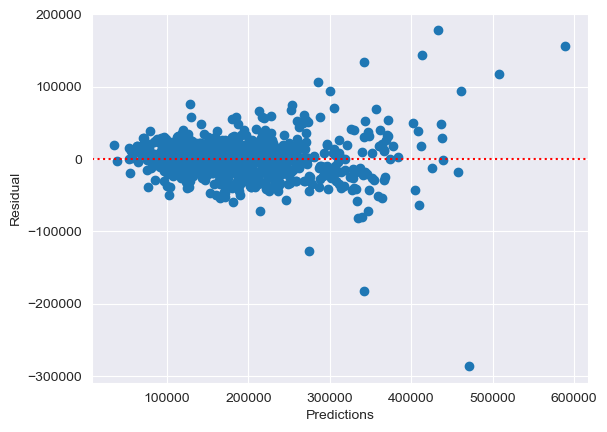

In [330]:

y_res = y_train - y_pred_train
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


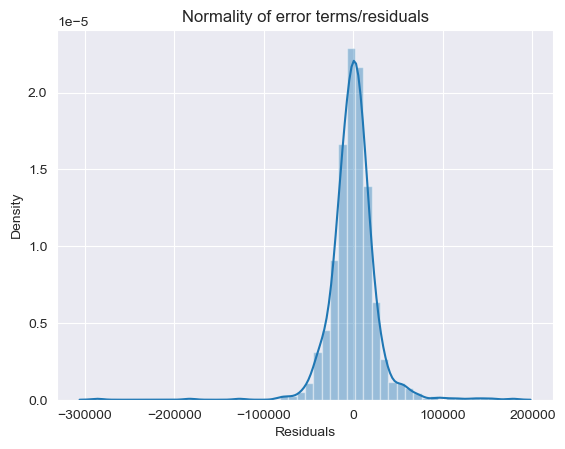

In [331]:
# Distribution of errors
p = sns.distplot(y_res, kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()


r2 test score: -3.889127483698012e+19


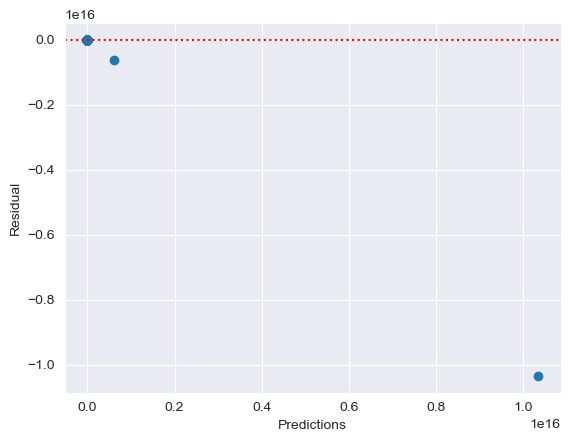

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


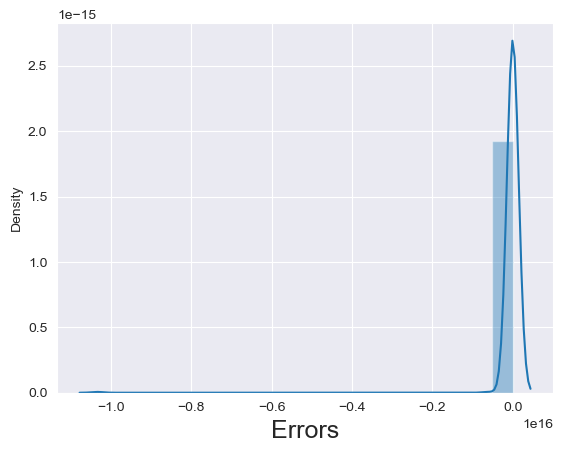

In [332]:

X_test[numerical_cols + categorical_ordinal_cols] = scaler.transform(X_test[numerical_cols + categorical_ordinal_cols])
y_pred_test = lm.predict(X_test)
r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test score: {}".format(r2_test_lr) )
#
y_test_res = y_test - y_pred_test

plt.scatter( y_pred_test , y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_test_res, bins=20)
plt.xlabel('Errors', fontsize= 18)
plt.show()


The r-squared value on the test data seems to be very low and the error shows a pattern and isn't normally distributed
This shows that the model is over-fits the training data and hence fails on the test data
We go ahead with Lasso regularization to improve the r-square value and also do feature selection

### Lasso Regularization



In [333]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,150,200,250,500, 1000 ]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+11, tolerance: 4.845e+08
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 31 candidates, totalling 155 fits


D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.798e+11, tolerance: 5.145e+08
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.921e+11, tolerance: 5.169e+08
  model = cd_fast.enet_coordinate_descent(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.709e+11, tolerance: 5.308e+08
  model = cd_fast.enet_

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 150, 200, 250, 500, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [334]:
# Setting the alpha on the model
alpha = model_cv.best_params_['alpha']
print("Setting hyper-parameter to {}".format(alpha))
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_


Setting hyper-parameter to 250


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.64274094e+05,  0.00000000e+00,  0.00000000e+00,
        5.13830895e+03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -7.10361641e+03, -1.91522352e+04, -6.96577177e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.68560826e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.23299417e+04, -9.11968756e+03, -6.54624807e+03, -0.00000000e+00,
       -0.00000000e+00,  9.80250754e+03, -0.00000000e+00,  4.77259295e+03,
       -3.41454071e+03,  1.35242255e+03, -0.00000000e+00, -2.70521898e+03,
        8.29085565e+03, -0.00000000e+00, -0.00000000e+00, -6.92758161e+02,
       -0.00000000e+00,  0.00000000e+00,  4.60902711e+03,  0.00000000e+00,
        0.00000000e+00,  1.96463486e+04, -1.07376268e+04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -7.48096167e+02,
       -0.00000000e+00,  

In [335]:
coef_list = list(zip(X.columns, lasso.coef_))
selected_features = [t for t in coef_list if (t[1] < 0 or t[1] > 0) ]
print("Selected features: {}".format(len(selected_features)))
sorted(selected_features,key=lambda x: x[0])

Selected features: 72


[('BedroomAbvGr_3', 388.9613882304786),
 ('BedroomAbvGr_4', 6128.844058504365),
 ('BsmtExposure_Gd', 19278.915467029467),
 ('BsmtExposure_No', -1724.4806649942066),
 ('BsmtExposure_NoBasement', -5501.649435049099),
 ('BsmtFinType1_BLQ', 372.1569963100206),
 ('BsmtFinType1_GLQ', 6504.548210196526),
 ('BsmtFinType1_NoBasement', -1036.870491883926),
 ('BsmtFinType1_Unf', -5943.6896072391555),
 ('BsmtFullBath_1', 6059.532610671045),
 ('BsmtQual_Fa', -1696.1865719639475),
 ('BsmtQual_Gd', -8487.500328460379),
 ('BsmtQual_NoBasement', -6642.797375662299),
 ('BsmtQual_TA', -9816.667701077953),
 ('Built_Yrs', -7103.616414517693),
 ('ExterQual_TA', -12089.121271882783),
 ('Exterior1st_BrkFace', 12183.815767477494),
 ('Exterior1st_HdBoard', -316.2530720377715),
 ('Exterior1st_Plywood', 23.022675690260886),
 ('Exterior2nd_Stucco', -115.36023293072309),
 ('Exterior2nd_Wd Shng', -281.8760986954882),
 ('FireplaceQu_Gd', 783.2484253663918),
 ('FireplaceQu_NoFireplaceQu', -6345.024421516013),
 ('Firep

In [336]:
# Lets calculate some metrics such as R2 score, RSS and MSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric = []
r2_train_lr = round(r2_score(y_train, y_pred_train),2)
print("r2 for training data: {}".format(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),2)
print("r2 for test data: {}".format(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),2)
print("RSS for training data: {}".format(rss1_lr))
metric.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),2)
print("RSS for test data: {}".format(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train),2)
print("RMSE Trained: {}".format(mse_train_lr ** 0.5, 2))
metric.append(mse_train_lr)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),2)
print("RMSE Test: {}".format(mse_test_lr ** 0.5))
metric.append(mse_test_lr)


r2 for training data: 0.86
r2 for test data: 0.85
RSS for training data: 894107566458.2
RSS for test data: 415547016216.67
RMSE Trained: 29679.861087107533
RMSE Test: 30872.147426766413


### Residual Analysis

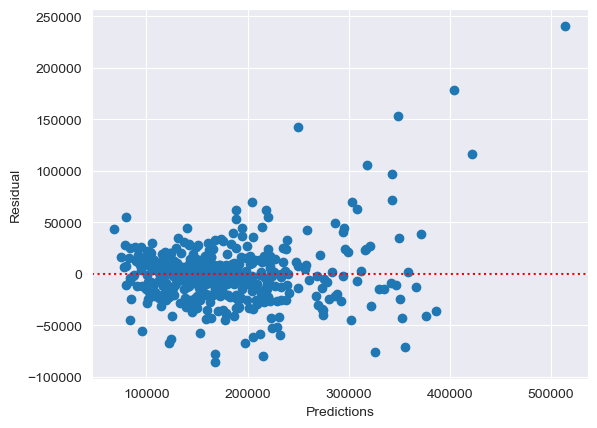

In [337]:
y_test_res = y_test - y_pred_test

plt.scatter(y_pred_test, y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


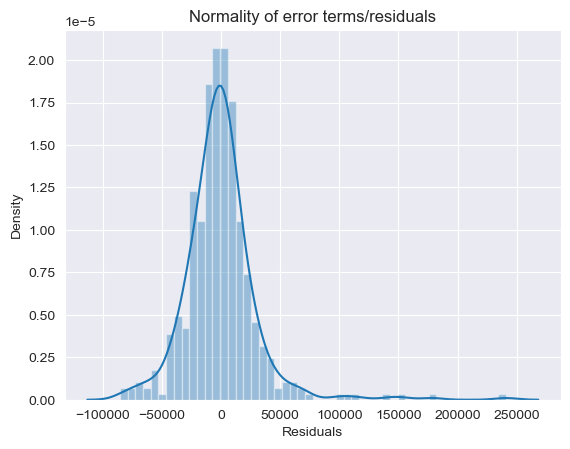

In [338]:
# Distribution of errors
p = sns.distplot(y_test_res, kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

The residual analysis shows the errors are normally distributed and shows no pattern to the predictions


# Ridge Regression

In [339]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,150,200,250,500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 150, 200, 250, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [340]:
print(model_cv.best_params_)

{'alpha': 6.0}


In [341]:
alpha = model_cv.best_params_['alpha']
print("Setting hyper-parameter to {}".format(alpha))
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)

y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = round(r2_score(y_train, y_pred_train),2)
print("r2 for training data: {}".format(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = round(r2_score(y_test, y_pred_test),2)
print("r2 for test data: {}".format(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = round(np.sum(np.square(y_train - y_pred_train)),2)
print("RSS for training data: {}".format(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = round(np.sum(np.square(y_test - y_pred_test)),2)
print("RSS for test data: {}".format(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = round(mean_squared_error(y_train, y_pred_train), 2)
print("RMSE Trained: {}".format(mse_train_lr ** 0.5))
metric2.append(mse_train_lr)

mse_test_lr = round(mean_squared_error(y_test, y_pred_test),2)
print("RMSE Test: {}".format(mse_test_lr ** 0.5))
metric2.append(mse_test_lr)


Setting hyper-parameter to 6.0
r2 for training data: 0.88
r2 for test data: 0.86
RSS for training data: 776815868147.92
RSS for test data: 388066293507.07
RMSE Trained: 27664.703697852976
RMSE Test: 29833.87849760738


### Residual Analysis


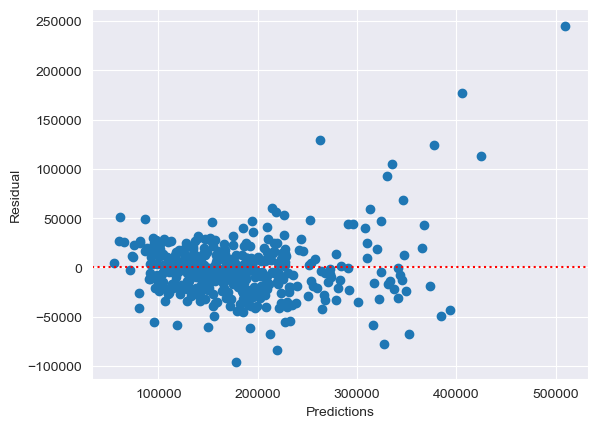

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


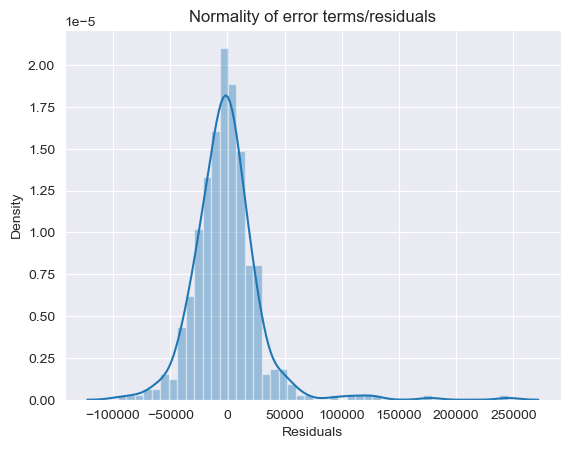

In [342]:
y_test_res = y_test - y_pred_test

plt.scatter(y_pred_test, y_test_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

# Distribution of errors
p = sns.distplot(y_test_res, kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()


The residual analysis shows the errors are normally distributed and shows no pattern to the predictions


In [344]:
# comparing the metrics
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)',
                       'RSS (Train)', 'RSS (Test)',
                       'RMSE (Train)', 'RMSE (Test)'],
            }

lr_metric = pd.DataFrame(lr_table, columns=['Metric'])

rg_metric = pd.Series(metric2, name='Ridge Regression')
ls_metric = pd.Series(metric, name='Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)

final_metric
## Lets observe the changes in the coefficients after regularization

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.800000e-01,8.600000e-01
1,R2 Score (Test),8.600000e-01,8.500000e-01
2,RSS (Train),7.768159e+11,8.941076e+11
3,RSS (Test),3.880663e+11,4.155470e+11
4,RMSE (Train),7.653358e+08,8.808942e+08
5,RMSE (Test),8.900603e+08,9.530895e+08


In [345]:
# comparing the coefficients
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)


C:\Users\jubin\AppData\Local\Temp\ipykernel_1972\3805058743.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X.columns


,Ridge,Lasso
LotFrontage,295.220861,0.000000
LotArea,18702.495096,0.000000
MasVnrArea,15994.786645,0.000000
BsmtUnfSF,8150.320896,0.000000
1stFlrSF,27693.999056,0.000000
GrLivArea,44667.308584,164274.093523
BsmtFinSF1,12720.892014,0.000000
GarageArea,7474.120187,0.000000
WoodDeckSF,12255.431358,5138.308946
OpenPorchSF,6830.514915,0.000000


# Conclusion

The model created with Lasso regression, selected features that gave an r2 score:
    - r2 for training data: 0.86
- r2 for test data: 0.85
72 features where selected as a result using the Lasso Regression with a hyper-parameter of 250
- Positive correlation
- BedroomAbvGr 3/4 Bedrooms above grade 3 and 4
- BsmtExposure Gd - Good Basement Exposure
- BsmtFinType1 BLQ/GLQ - Below Average / Good Living Quarters
- BsmtFullBath 1 - 1 basement full bathrooms
- Exterior1st BrkFace/Plywood - Exterior covering on house
- FireplaceQu Gd/ TA - Good to Average Fireplace quality
- Fireplaces 2 - Number of fireplaces
- Foundation PConc - Type of foundation Poured Concrete
- FullBath 3 Full bathrooms above grade
- GarageCars 3 Size of garage in car capacity
- GarageType Attchd Garage location Attached to home
- GrLivArea: Above grade (ground) living area square feet
- HouseStyle 1Story	Style of dwelling One story
- LotConfig CulDSac Lot configuration
- LotShape IR2	Moderately Irregular shape of property
- MSSubClass 60 Identifies the type of dwelling involved in the sale
- MSZoning FV/RL - Identifies the general zoning classification of the sale.
- Floating Village Residential
- Residential Low Density
- Neighborhood Brookside/Crawford/Northridge/Northridge Heights/Stone Brook - Physical locations within Ames city limits
- OverallQual (8-10) Rates the overall material and finish of the house
- RoofStyle_Hip Type of roof
- TotRmsAbvGrd 10 Total rooms above grade (does not include bathrooms)
- WoodDeckSF Wood deck area in square feet
- Negative Correlation
- BsmtExposure No / NA when there is no basement exposure
- BsmtFinType1 Unf / NA when unfinished basement or un available
- BsmtQual Fa/Gd/NA/TA when basement Fair / Good / TA or not available
- Built_Yrs year of construction
- ExterQual TA - Average quality of the material used for the exterior
    - Exterior1st HdBoard Exterior covering on house is Hard Board
- Exterior2nd Stucco/Wd Sdng (Wood Siding) Exterior covering on house (if more than one material)
- FireplaceQu NA No Fireplace quality
- FullBath 1 Full bathrooms above grade
- GarageCars 1 Size of garage in car capacity
- GarageFinish NA/RFn/Unf - Interior finish of the garage NA/Rough Finished/ Unfinished
- GarageType NA No Garage
- HeatingQC Fa/Gd/TA - Fair/Good/Average Heating quality and condition
- KitchenQual Fa/Gd/TA - Fair/Good/Average Kitchen quality
- LotConfig Inside - Lot Configuration
- LotShape Reg	- Regular	shape of property
- MSSubClass 120/160/30/90 Identifies the type of dwelling involved in the sale
- MSZoning RM Residential Medium Density
- Neighborhood Edwards/NAmes/OldTown - Physical locations within Ames city limits
- OverallCond (1-4) Rates the overall condition of the house
- OverallQual (1-4) Rates the overall material and finish of the house
- RemodAdd_Yrs years since Remodel date
- RoofStyle_Gable Type of roof
- TotRmsAbvGrd 5 Total rooms above grade (does not include bathrooms)